In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [32]:
from compressai.video.rawvideo import RawVideoSequence
from compressai.video.eval_codec import convert_legal_to_full_range

from compressai.transforms.functional import (rgb2ycbcr, ycbcr2rgb, yuv_420_to_444, yuv_444_to_420)
from torchvision import transforms

In [86]:
sequence = RawVideoSequence.from_file('/data/lvc/UVG-1080p/YachtRide_1920x1080_120fps_420_8bit_YUV.yuv')
sequence.height, sequence.width, sequence.bitdepth

(1080, 1920, 8)

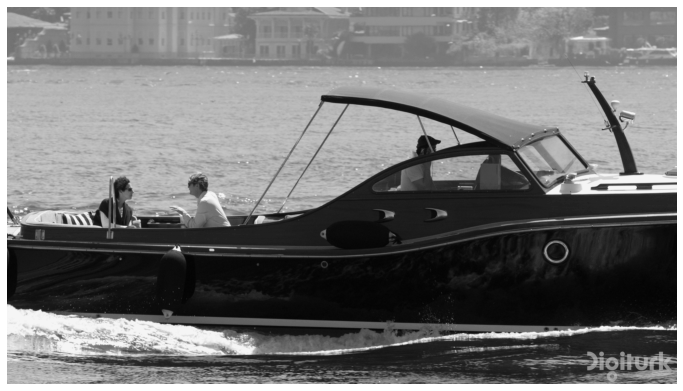

In [87]:
frame0 = sequence[0]
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(frame0[0], cmap='gray')
ax.axis('off')
plt.show()

In [109]:
frame0_rgb = ycbcr2rgb(yuv_420_to_444(tuple(torch.from_numpy(c).float().div(255.).unsqueeze(0).unsqueeze(0) for c in frame0), mode="nearest"))

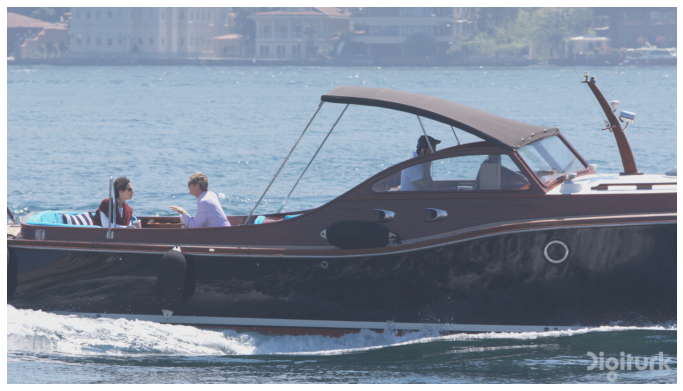

In [110]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.imshow(transforms.ToPILImage()(frame0_rgb.squeeze()))
ax.axis('off')
plt.show()

In [111]:
frame0_rec = yuv_444_to_420(rgb2ycbcr(frame0_rgb).mul(255.))

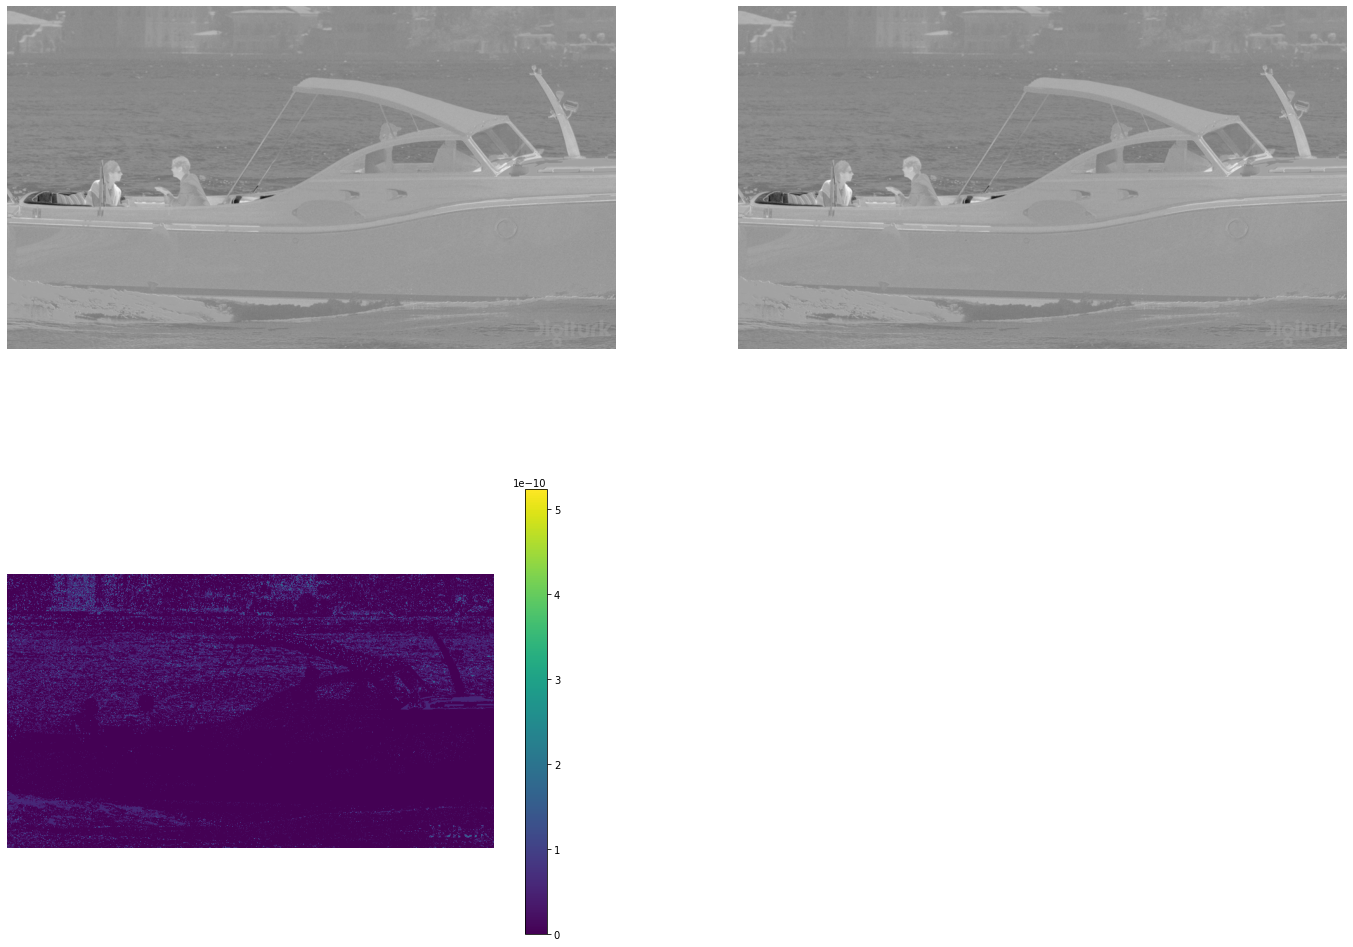

In [113]:
c = 2

fig, axs = plt.subplots(2, 2, figsize=(12*2, 2*9))
axs[0][0].imshow(frame0_rec[c].squeeze(), cmap='gray')
axs[0][0].axis('off')

axs[0][1].imshow(frame0[c].squeeze(), cmap='gray')
axs[0][1].axis('off')

im = axs[1][0].imshow((frame0_rec[c].squeeze() - frame0[c])**2, cmap='viridis')
axs[1][0].axis('off')
plt.colorbar(im, ax=axs[1][0])
axs[1][1].axis('off')
plt.show()